In [1]:
! git clone https://github.com/datasets/geo-boundaries-us-110m.git
! pip install -r requirements.txt

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import kaleido
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium import IFrame
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from branca.colormap import LinearColormap
import scienceplots as sp
from datetime import datetime, timedelta
from matplotlib.patches import FancyArrowPatch
import matplotlib.path as mpath
import random

from util import *
plt.style.use('science')

In [3]:
us_airport_loc = pd.read_csv('udata/us_airport_loc.csv')
flow = pd.read_csv('udata/_map_data.csv')
merged_data = pd.merge(us_airport_loc, flow, left_on='Name', right_on='Code', how='left')
u_mx = np.load('udata/udelay.npy')
od = np.load('udata/od_pair.npy')

arr = u_mx[:, :, 0].T
dep = u_mx[:, :, 1].T

df_arr = pd.DataFrame(arr, index=range(
    78912), columns=us_airport_loc['Name'].tolist())
df_dep = pd.DataFrame(dep, index=range(
    78912), columns=us_airport_loc['Name'].tolist())

`dropout_rate`: The rate at which connections between airports are randomly dropped.

`time_slot`: The specific time slot for the delay data.

Time 2016-01-01 06:00
Dropout Rate 0


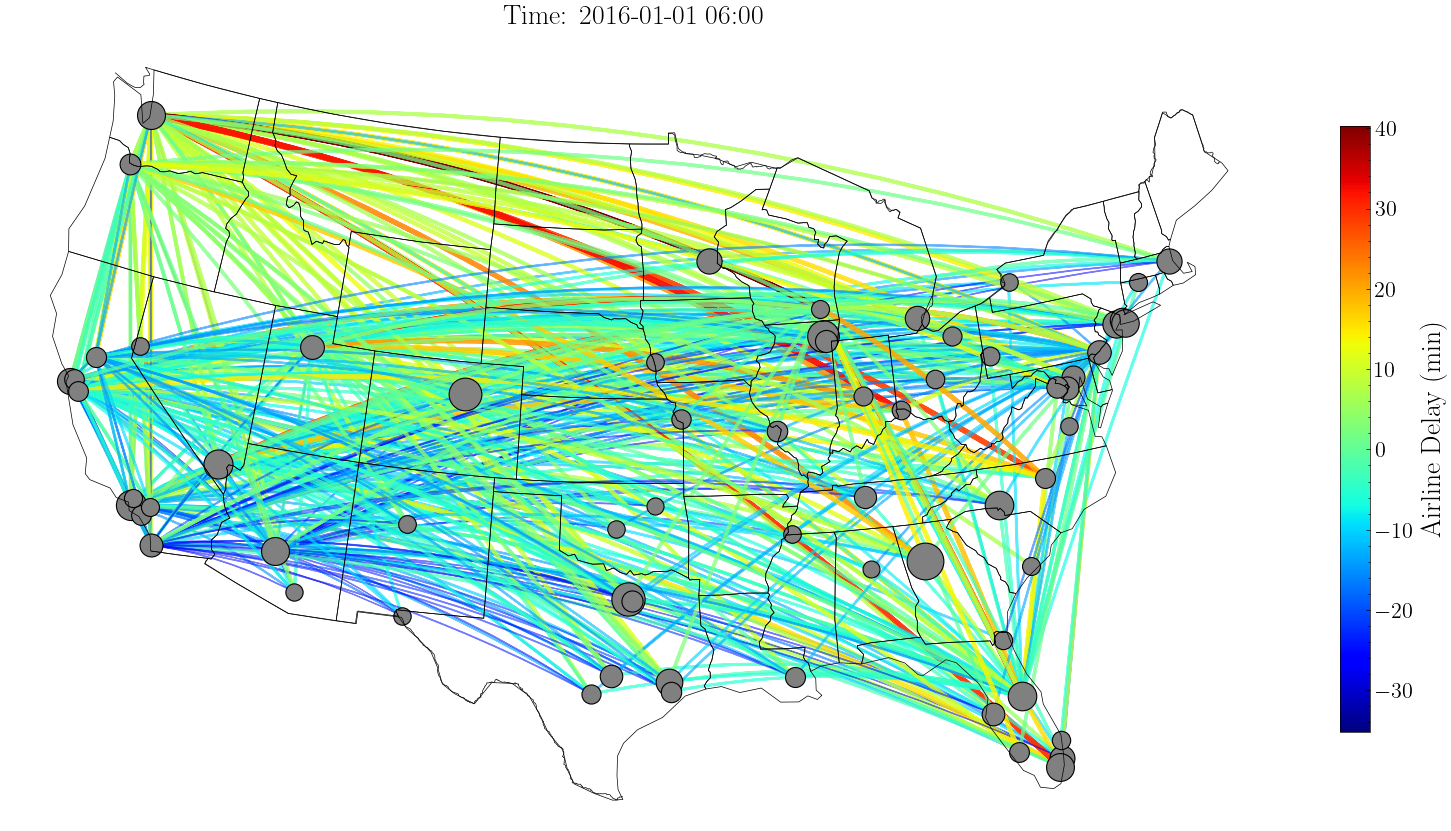

In [6]:
def plot_map(ax, time_slot, delay_type='dep', dropout_rate=0.5):
    map = Basemap(llcrnrlon=-120, llcrnrlat=22, urcrnrlon=-63, urcrnrlat=49,
                  rsphere=(6378137.00, 6356752.3142),
                  resolution='i', area_thresh=1000., projection='lcc',
                  lat_1=33, lat_2=45, lat_0=39, lon_0=-96, ax=ax)

    map.readshapefile('geo-boundaries-us-110m/shp/ne_110m_admin_1_states_provinces_shp', 'countries', drawbounds=True)
    map.drawcountries(linewidth=0.5, color='black')

    od_delay = get_od_delay(time_slot, 70, dropout_rate=dropout_rate)
    plot_edges(ax, map, od_delay)
    plot_airports(ax, map, s=40, time_slot=time_slot, delay_type=delay_type)
    return map


fig, ax = plt.subplots(figsize=(16, 9))
dropout = 0
time_slot = 0
od_delay = get_od_delay(time_slot, 70, dropout_rate=dropout)
plot_map(ax, time_slot, 'dep', dropout_rate=dropout)
ax.set_title('Time: ' + slot_to_time(time_slot), fontsize=20)
plt.tight_layout()

# if you want to remove the frame
for spine in ax.spines.values():
    spine.set_visible(False)


od_values = list(od_delay.values())
norm = plt.Normalize(min(od_values), max(od_values))
cmap = plt.get_cmap('jet')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label='Airline Delay (min)', shrink=0.72, ax=ax)
cbar.set_label('Airline Delay (min)', fontsize=20)
cbar.ax.tick_params(labelsize=16)


print('Time', slot_to_time(time_slot))
print('Dropout Rate', dropout)
plt.show()

In [5]:
# get_od_delay(0, 70)